# An Identiconizer generator implementation in Python

This small notebook implements a generator of small square icons like the ones in GitHub, as [implemented by identicon.js](https://github.com/stewartlord/identicon.js#identiconjs).

## The function

In [77]:
import numpy as np
from matplotlib.colors import hsv_to_rgb
from PIL import Image, ImageDraw

In [78]:
%load_ext watermark
%watermark
%watermark -a "Lilian Besson (Naereen)" -p numpy,matplotlib,PIL

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
2017-11-25T17:38:55+01:00

CPython 3.6.3
IPython 6.2.1

compiler   : GCC 7.2.0
system     : Linux
release    : 4.13.0-17-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit
Lilian Besson (Naereen) 

numpy 1.13.3
matplotlib 2.1.0
PIL 4.3.0


In [153]:
size = 128
margin = 0.12
foreground = (255,0,0,255)
background = (240,240,240,255)
saturation = 0.7
brightness = 0.5

In [154]:
border = int(size * margin)

In [156]:
def identicon(hashval=None,
              size=128,
              margin=0.12,
              foreground=(255,0,0,255),
              background=(240,240,240,255),
              saturation=0.7,
              brightness=0.5,
    ):
    if hashval is not None:
        if isinstance(hashval, str):
            hashval = str(hex(abs(hash(hashval))))[2:]
        hue = int(hashval, 16) % 256**3
        foreground = tuple(np.array(hsv_to_rgb([hue, saturation, brightness]) * 256, dtype=int)) 

    border = int(size * margin)
    
    # make a blank image
    im = Image.new('RGBA', (size,size), background)
    
    # get a drawing context
    d = ImageDraw.Draw(im)

    def rect(xy):
        try:
            x1, y1, x2, y2 = xy
        except ValueError:
            x1, y1 = xy[0]
            x2, y2 = xy[1]
        d.rectangle((border+x1, border+y1, border+x2, border+y2), fill=foreground)
        d.rectangle((size-border-x1, border+y1, size-border-x2, border+y2), fill=foreground)

    return im, d, rect

In [157]:
im, d, rect = identicon("Naereen")

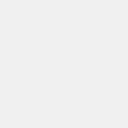

In [158]:
im

In [169]:
rect([(0, 10), (20, 60)])
rect([(0, 0), (50, 10)])
rect([(40, 80), (60, 90)])


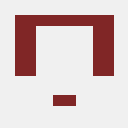

In [170]:
im

## Tests

## Conclusion

> *That's it for today, folks!* [See on my GitHub for more notebooks](https://github.com/Naereen/notebooks)